In [1]:
!pip install openai
!pip install langchain-community langchain-core
!pip install transformers[sentencepiece]
!pip install diffusers
!pip install accelerate

In [2]:
!pip install llmlingua openai datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 41.7 MB/s eta 0:00:00


In [3]:
from langchain.prompts.chat import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.chat_history import BaseChatMessageHistory
from pydantic import BaseModel, Field
from typing import List
from openai import OpenAI


from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_core.messages import AIMessage, HumanMessage, BaseMessage




In [4]:
class InMemoryHistory(BaseChatMessageHistory, BaseModel):
    """In-memory implementation of chat message history."""
    messages: List[BaseMessage] = Field(default_factory=list)

    def add_messages(self, messages: List[BaseMessage]) -> None:
        """Add messages to the history."""
        self.messages.extend(messages)

    def clear(self) -> None:
        """Clear the message history."""
        self.messages = []

# Global variable to store chat message history for each session
store = {}

def get_by_session_id(session_id: str) -> BaseChatMessageHistory:
    """Return a chat history for the given session."""
    if session_id not in store:
        store[session_id] = InMemoryHistory()
    return store[session_id]

In [5]:
# Class for the interactive tattoo design process
class TattooDesignerInteractive:
    def __init__(self):
        # List of questions to ask the user during the interactive session
        self.questions = [
            "Let's start with your initial idea. Can you describe your tattoo concept?",
            "Which tattoo style do you prefer? (Blackwork, Black and Grey, Realism)",
            "Where would you like the tattoo to be placed on your body? (e.g., arm, leg, back, etc.)",
            "What size do you envision for your tattoo? (Small, Medium, Large)?",
#             "What is the theme or subject of your tattoo? (e.g., animals, nature, abstract, portrait)",
            "How detailed would you like the tattoo to be? (Minimalistic, Medium detail, Highly detailed)",
            "Would you like to add any personal elements such as initials, dates, or quotes?",
            "Any other details you want to add?"
        ]
        # Initialize the current question index
        self.current_question = 0

    # Method to handle dynamic question flow based on user input
    def dynamic_question_flow(self, session_id, user_input):
        """Dynamically generates questions based on user input."""
        # Retrieve chat history by session ID (placeholder function)
        history = get_by_session_id(session_id)

        # Check if more questions are available to ask
        if self.current_question < len(self.questions):
            # Add user input to the chat history
            history.add_messages(f"{self.questions[self.current_question]}: {user_input}")
            # Move to the next question
            self.current_question += 1

            # Return the next question if there are more, else signal the end
            if self.current_question < len(self.questions):
                return self.questions[self.current_question]
            else:
                return "Thank you! Your tattoo description will be generated shortly."
        else:
            # If no more questions, end the process
            return "Thank you! Your tattoo description will be generated shortly."

    # Method to generate the tattoo design prompt based on collected user answers
    def generate_design_prompt(self, session_id):
        """Generate a detailed tattoo design prompt based on all collected answers."""
        # Placeholder OpenAI API key (replace with a secure key for production)
        OPENAI_API_KEY = ""
        # Initialize OpenAI client
        client = OpenAI(api_key=OPENAI_API_KEY)
        # Retrieve chat history for the current session
        history = get_by_session_id(session_id)
        # Collect all user input from the session history
        collected_info = "\n".join(history.messages)
        # Create a prompt template for generating a tattoo design based on user preferences
        
        
        
#         prompt_template = f"""
#         You are a professional tattoo designer specializing in creating realistic and stylized tattoo designs for permanent ink on human skin. Your goal is to geenrate a tattoo description based on the user's preferences, ensuring the design is suitable for tattooing on skin and aligns with the selected style. 

#         - If the user chose Blackwork, the design should reflect classic Blackwork tattoo characteristics: bold, solid black areas with thick outlines, sharp contrasts, and intentional use of negative space or 'skin-breaks'. The design should appear strong and graphic, mimicking the traditional ink on skin.
#         - If the user chose Black and Grey, the design should follow Black and Grey tattoo techniques: using only black ink diluted to various shades of grey, with smooth gradients, shading, and subtle transitions to create depth and realism. The design should mimic the appearance of ink shaded on skin, focusing on lifelike details and soft contrasts.
#         - If the user chose Realism, the tattoo design should be incredibly detailed and lifelike, with intricate shading and highlights to create a three-dimensional effect. It should look so realistic that it could be mistaken for a photograph. Emphasize complex shading and precise details, especially around key elements.
#         - The tattoo should be designed for placement on body part mentioned by the user, meaning it should flow naturally with the contours of the skin in this area. 

#         Here are the specific preferences provided by the user: "{collected_info}"

#         Create a tattoo design that fits these preferences, emphasizing the style, precision, and the fact that it will be a permanent, inked design on human skin. Ensure the design considers tattoo artistry techniques like shading, linework, and how the design will appear when applied to skin texture.
#         """

#         prompt_template = f"""
#         You are a professional tattoo designer specializing in creating realistic and stylized tattoo designs for permanent ink on human skin. Your task is to create a tattoo description based on the user's preferences, ensuring the design aligns with the chosen style.

#         - **Tattoo Style**: The style is the most critical element and should be emphasized early on. 
#         - **Blackwork**: Known for bold, solid black areas, thick outlines, sharp contrasts, and deliberate use of negative space ('skin-breaks'), this style creates strong, graphic designs that mimic traditional ink.
#         - **Black and Grey**: Defined by its use of black ink diluted to various shades of grey, this style features smooth gradients and soft transitions that add depth and realism, especially through detailed shading.
#         - **Realism**: This style emphasizes intricate, lifelike details with precise shading and highlights to create a three-dimensional, photographic effect on the skin.

#         **Subject**: The subject of the tattoo should reflect the user's preferences and be depicted in a way that enhances its meaning and visual impact on the skin.

#         **Setting and Placement**: The tattoo should flow naturally with the chosen body part, considering skin texture, natural movement, and visibility. Ensure the design fits comfortably within the space and enhances the contours of the body, maintaining balance from all angles.

#         The user's preferences are: "{collected_info}"

#         Design the tattoo based on these details, keeping in mind shading, linework, and how it will appear as a permanent inked design on human skin.
# """

        prompt_template = f"""
        You are a professional tattoo designer specializing in creating realistic and stylized tattoo designs for permanent ink on human skin. Your task is to craft a tattoo description that first delivers the **overall visual impression** clearly and concisely, followed by more intricate details of the design. The description should align with the user's preferences and the selected style.

        **Tattoo Overview** (first 77 tokens): Begin by describing the general look and feel of the tattoo, emphasizing the primary subject, style, and how it will appear on the selected body part. 
        - If the user chose Blackwork, the design should reflect classic Blackwork tattoo characteristics: bold, solid black areas with thick outlines, sharp contrasts, and intentional use of negative space or 'skin-breaks'. The design should appear strong and graphic, mimicking the traditional ink on skin.
        - If the user chose Black and Grey, the design should follow Black and Grey tattoo techniques: using only black ink diluted to various shades of grey, with smooth gradients, shading, and subtle transitions to create depth and realism. The design should mimic the appearance of ink shaded on skin, focusing on lifelike details and soft contrasts.
        - If the user chose Realism, this style is focused on creating highly detailed, lifelike designs that maintain the look and texture of ink on skin. While the design captures realistic proportions, intricate shading, and fine details, it retains the essence of tattoo art, ensuring that the tattoo doesn't lose its organic, ink-based quality. The shading and highlights should create depth and dimension, but the overall effect remains grounded in the texture of the skin, giving it a natural tattooed appearance rather than mimicking a photograph. Emphasize the smooth integration of shading with the body’s natural contours and skin tone, enhancing key elements without compromising the tattooed look.

        - The tattoo should be designed for placement on body part mentioned by the user, meaning it should flow naturally with the contours of the skin in this area. 

        **Finer Details**: After the initial overview, expand on the finer elements, such as:
        - Intricate shading techniques (for Black and Grey or Realism) or deliberate use of negative space (for Blackwork).
        - Specific textures, highlights, and additional elements that bring depth and dimension to the design.
        - How the tattoo will wrap around or complement the contours of the body part, considering the skin’s natural texture and movement.

        The user's preferences are: "{collected_info}"

        Design the tattoo with both the broad visual impact and the finer artistry in mind, ensuring it will translate well as a permanent inked design on human skin.
        """


        
        # Call the OpenAI API to generate a tattoo design description based on the prompt
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "system", "content": prompt_template}],
            max_tokens=250,
        )
        # Return the generated tattoo design description from the API response
        return response.choices[0].message


In [6]:
# Function to simulate the interactive tattoo design process
def interactive_tattoo_design(session_id):
    # Initialize the interactive tattoo designer object
    designer = TattooDesignerInteractive()
    # Retrieve chat history for the session (placeholder function)
    history = get_by_session_id(session_id)

    # Start the interactive session by greeting the user and asking the first question
    print("Let's design your tattoo! Please answer a few questions.")
    print("\nAssistant: ", designer.questions[0])  # Ask the first question

    # Loop to continue asking questions and collecting answers from the user
    while True:
        # Get user input as an answer to the current question
        user_input = input("\nYou: ")
        # Add the user input to the chat history
        history.add_messages(user_input)

        # Dynamically move to the next question based on user input
        next_question = designer.dynamic_question_flow(session_id, user_input)
        # Print the next question to the user
        print("\nAssistant: ", next_question)

        # Break the loop when all questions are answered
        if next_question == "Thank you! Your tattoo description will be generated shortly.":
            break

    # Generate the final detailed tattoo design prompt after all questions are answered
    detailed_prompt = designer.generate_design_prompt(session_id)
    # Print the final tattoo design prompt
    print("\nFinal Tattoo Design Prompt:\n", detailed_prompt)

In [7]:
from llmlingua import PromptCompressor

llm_lingua = PromptCompressor(
    model_name="microsoft/llmlingua-2-xlm-roberta-large-meetingbank",
    use_llmlingua2=True,
)

config.json:   0%|          | 0.00/752 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

In [8]:
from huggingface_hub import notebook_login
notebook_login()
# 

In [9]:
import torch
from diffusers import FluxPipeline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)# can replace schnell with dev
# to run on low vram GPUs (i.e. between 4 and 32 GB VRAM)
pipe.enable_sequential_cpu_offload()
pipe.vae.enable_slicing()
pipe.vae.enable_tiling()

pipe.to(torch.float16)

model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

(…)t_encoder_2/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

tokenizer_2/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/3.87G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


FluxPipeline {
  "_class_name": "FluxPipeline",
  "_diffusers_version": "0.30.3",
  "_name_or_path": "black-forest-labs/FLUX.1-dev",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [39]:
session_id = "user-session-4"
interactive_tattoo_design(session_id)

Let's design your tattoo! Please answer a few questions.

Assistant:  Let's start with your initial idea. Can you describe your tattoo concept?

You: A Phoenix bird

Assistant:  Which tattoo style do you prefer? (Blackwork, Black and Grey, Realism)

You: Realism

Assistant:  Where would you like the tattoo to be placed on your body? (e.g., arm, leg, back, etc.)

You: arm

Assistant:  What size do you envision for your tattoo? (Small, Medium, Large)?

You: medium

Assistant:  How detailed would you like the tattoo to be? (Minimalistic, Medium detail, Highly detailed)

You: highly detailed

Assistant:  Would you like to add any personal elements such as initials, dates, or quotes?

You: no

Assistant:  Any other details you want to add?

You: no

Assistant:  Thank you! Your tattoo description will be generated shortly.

Final Tattoo Design Prompt:
 ChatCompletionMessage(content="**Tattoo Overview:** This design encapsulates the majesty of a phoenix in the Realism style, tailored to fit t

In [11]:
prompt = """The phoenix tattoo will be done in a Realism style, featuring lifelike detail while still maintaining the organic quality of a tattoo on skin. The bird is depicted mid-flight, wings fully spread across the upper arm, with intricate black shading that creates depth and a dynamic sense of movement. Its fiery feathers transition smoothly from darker tones at the base to lighter, glowing highlights towards the tips, evoking the bird’s rebirth from ashes without losing the texture of ink on skin.
The phoenix’s body will be positioned to flow naturally along the curvature of the arm, starting from the shoulder with the wings wrapping around the bicep. Complex shading around the bird’s chest and talons will emphasize musculature and strength, while the feathers’ texture is finely detailed but not overly sharp, giving the design a realistic yet artistically softened feel. The tail feathers will taper down the forearm, with subtle highlights adding dimension without overwhelming the overall look.
The tattoo will maintain a balanced integration with the skin’s natural tone, ensuring it enhances the contours of the arm without appearing too flat or photographic. The final effect is a phoenix that appears almost alive, with a strong presence but unmistakably grounded in the world of tattoo art."""
print(prompt)

The phoenix tattoo will be done in a Realism style, featuring lifelike detail while still maintaining the organic quality of a tattoo on skin. The bird is depicted mid-flight, wings fully spread across the upper arm, with intricate black shading that creates depth and a dynamic sense of movement. Its fiery feathers transition smoothly from darker tones at the base to lighter, glowing highlights towards the tips, evoking the bird’s rebirth from ashes without losing the texture of ink on skin.
The phoenix’s body will be positioned to flow naturally along the curvature of the arm, starting from the shoulder with the wings wrapping around the bicep. Complex shading around the bird’s chest and talons will emphasize musculature and strength, while the feathers’ texture is finely detailed but not overly sharp, giving the design a realistic yet artistically softened feel. The tail feathers will taper down the forearm, with subtle highlights adding dimension without overwhelming the overall loo

In [42]:
compressed_final_response = llm_lingua.compress_prompt(
                context=prompt,
                rate=0.33,
                force_tokens=["!", ".", "?", "\n"],
                drop_consecutive=True,
            )
final_prompt = compressed_final_response["compressed_prompt"]
print(final_prompt)

design phoenix Realism contours arm. medium-sized high detail mythic bird characteristics. tattoo phoenix essence precision naturalistic form curves arm.
 Phoenix arm beak shoulder feathers forearm. rebirth contrasts dark light. feathers gradient black grey white phoenix life cycle rebirth.
 bird’s eye focal point. beak intricate etchings lifelike texture. flames backdrop dark shadows highlights. flames accentuate arm muscles


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the tips, evoking the bird ’ s rebirth from ashes without losing the texture of ink on skin. the phoenix ’ s body will be positioned to flow naturally along the curvature of the arm, starting from the shoulder with the wings wrapping around the bicep. complex shading around the bird ’ s chest and talons will emphasize musculature and strength, while the feathers ’ texture is finely detailed but not overly sharp, giving the design a realistic yet artistically softened feel. the tail feathers will taper down the forearm, with subtle highlights adding dimension without overwhelming the overall look. the tattoo will maintain a balanced integration with the skin ’ s natural tone, ensuring it enhances the contours of the arm without appearing too flat or photographic. the final effect is a phoenix that appears almost alive, with a strong presence but unmistakably grounded in the world of 

  0%|          | 0/50 [00:00<?, ?it/s]

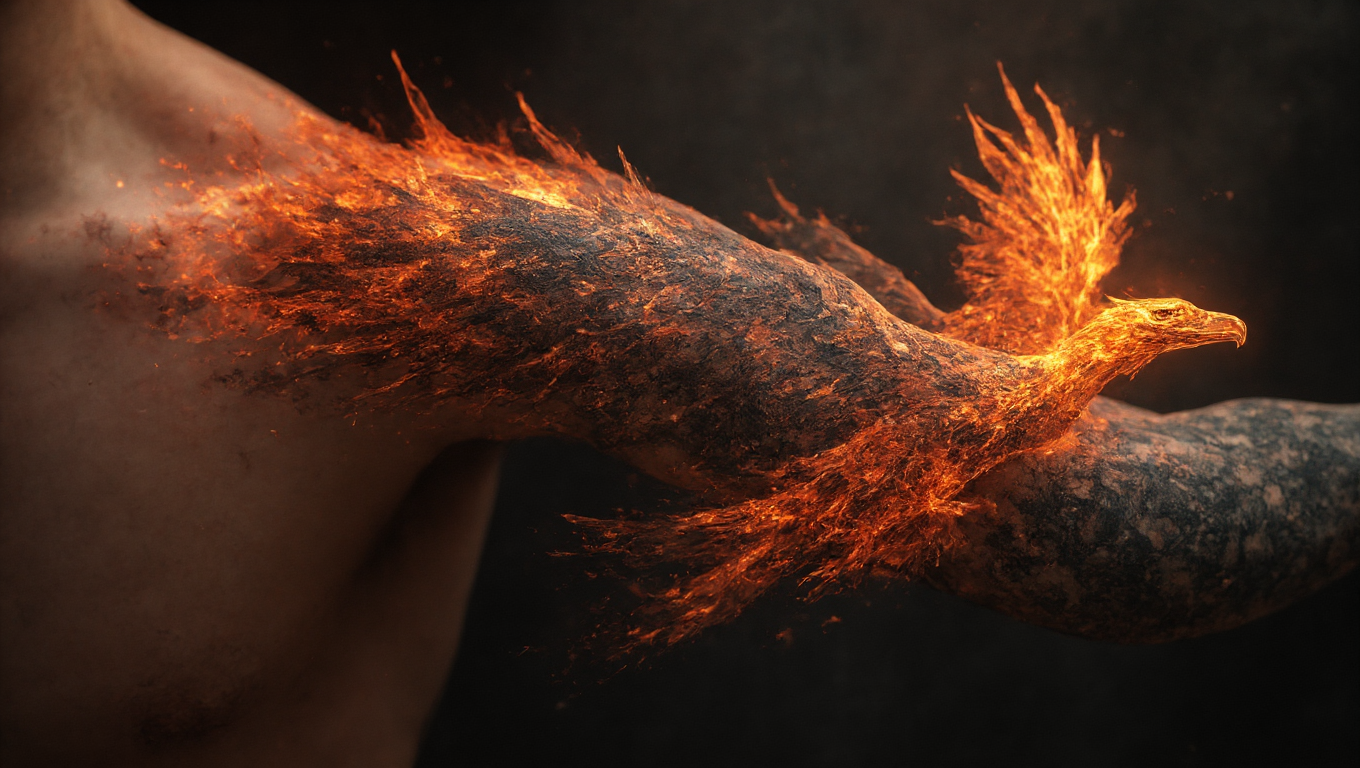

In [45]:
out = pipe(
    prompt=prompt,
    guidance_scale=0.6,
    height=768,
    width=1360,
    num_inference_steps=50,
).images[0]

out

In [23]:
out.save("rose1.png")

# Embedding usage

In [2]:
!pip install git+https://github.com/xhinker/sd_embed.git@main

  Cloning https://github.com/xhinker/sd_embed.git (to revision main) to /tmp/pip-req-build-7ajtiash
  Running command git clone --filter=blob:none --quiet https://github.com/xhinker/sd_embed.git /tmp/pip-req-build-7ajtiash
  Resolved https://github.com/xhinker/sd_embed.git to commit 168dda0b883e196061022d50012defddf9c5b4dd
  Preparing metadata (setup.py) ... done


In [3]:
!pip install torchao --extra-index-url https://download.pytorch.org/whl/cu121 # full options are cpu/cu118/cu121/cu124

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu121


In [4]:
!pip install torchao

In [3]:
from diffusers import DiffusionPipeline, FluxTransformer2DModel

In [26]:
# from torchao.quantization import quantize_, int8_weight_only

In [4]:
import torch
from sd_embed.embedding_funcs import get_weighted_text_embeddings_flux1

In [5]:
model_path = "black-forest-labs/FLUX.1-dev"

In [6]:
transformer = FluxTransformer2DModel.from_pretrained(
    model_path
    , subfolder = "transformer"
    , torch_dtype = torch.bfloat16
)

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
print(transformer.hf_device_map)

{'': 'cpu'}


In [8]:
pipe = DiffusionPipeline.from_pretrained(
    model_path
    , transformer = transformer
    , torch_dtype = torch.bfloat16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [9]:
pipe.enable_model_cpu_offload()

In [12]:
prompt_embeds, pooled_prompt_embeds = get_weighted_text_embeddings_flux1(
    pipe        = pipe
    , prompt    = prompt
)

Token indices sequence length is longer than the specified maximum sequence length for this model (261 > 77). Running this sequence through the model will result in indexing errors


In [13]:
print(prompt_embeds.shape)

torch.Size([1, 300, 4096])


In [14]:
print(pipe.hf_device_map)

None


In [14]:
image = pipe(
    prompt_embeds               = prompt_embeds
    , pooled_prompt_embeds      = pooled_prompt_embeds
    , width                     = 896
    , height                    = 1280
    , num_inference_steps       = 20
    , guidance_scale            = 4.0
    , generator                 = torch.Generator().manual_seed(1234)
).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 72.00 MiB. GPU 0 has a total capacity of 21.99 GiB of which 9.38 MiB is free. Including non-PyTorch memory, this process has 21.97 GiB memory in use. Of the allocated memory 21.67 GiB is allocated by PyTorch, and 2.62 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)